In [1]:
import pandas as pd
import tensorflow as tf

dataframe = pd.read_csv("Cars.csv")
dataframe = dataframe.drop(["v.id", "on road old", "on road now"], axis = 1)

In [2]:
# Visualize Data

import seaborn as sb

sb.pairplot(data = dataframe)

In [3]:
dataframe

,years,km,rating,condition,economy,top speed,hp,torque,current price
0,3,78945,1,2,14,177,73,123,351318.0
1,6,117220,5,9,9,148,74,95,285001.5
2,2,132538,2,8,15,181,53,97,215386.0
3,4,101065,4,3,11,197,54,116,244295.5
4,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...
995,5,125092,1,6,11,171,95,97,190744.0
996,4,83370,2,9,14,161,101,120,419748.0
997,7,86722,1,8,9,196,113,89,405871.0
998,2,140478,4,5,9,184,112,128,74398.0


In [4]:
# Seperate the data
features = dataframe.iloc[:, :-1]
label = dataframe.iloc[:, -1]

# Feature scaling
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
scaled_features = feature_scaler.fit_transform(features)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, label.values, test_size = 0.2)
print(f"X_train: {len(X_train)}, X_test: {len(X_test)}, y_train: {len(y_train)}, y_test: {len(y_test)}")

X_train: 800, X_test: 200, y_train: 800, y_test: 200


In [6]:
### Build Neural Network
from keras import Sequential
ANN = Sequential()

from keras.layers import Dense, InputLayer
ANN.add( InputLayer(shape = (8,)) )
ANN.add( Dense(units = 8, activation = "relu") )
ANN.add( Dense(units = 8, activation = "relu") )
ANN.add( Dense(units = 8, activation = "relu") )
ANN.add( Dense(units = 8, activation = "relu") )
ANN.add( Dense(units = 8, activation = "relu") )
ANN.add( Dense(units = 1) )

In [7]:
### Train ANN
from keras.metrics import MeanAbsoluteError, Accuracy
from keras.losses import MeanSquaredError
ANN.compile( optimizer = "adam", loss = MeanSquaredError(), metrics = [MeanAbsoluteError(), Accuracy()] )
ANN.fit(scaled_features, label, epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: 109221830656.0000 - mean_absolute_error: 305298.5625
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.0000e+00 - loss: 110760239104.0000 - mean_absolute_error: 308595.8438
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 114267283456.0000 - mean_absolute_error: 313722.2500 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 109757849600.0000 - mean_absolute_error: 306529.2500 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 110697480192.0000 - mean_absolute_error: 307926.7188 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 110746968064.0000 - mean_absolute_error: 308228.9062 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 109092560896.0000 - mean_absolute_error: 305599.0000
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

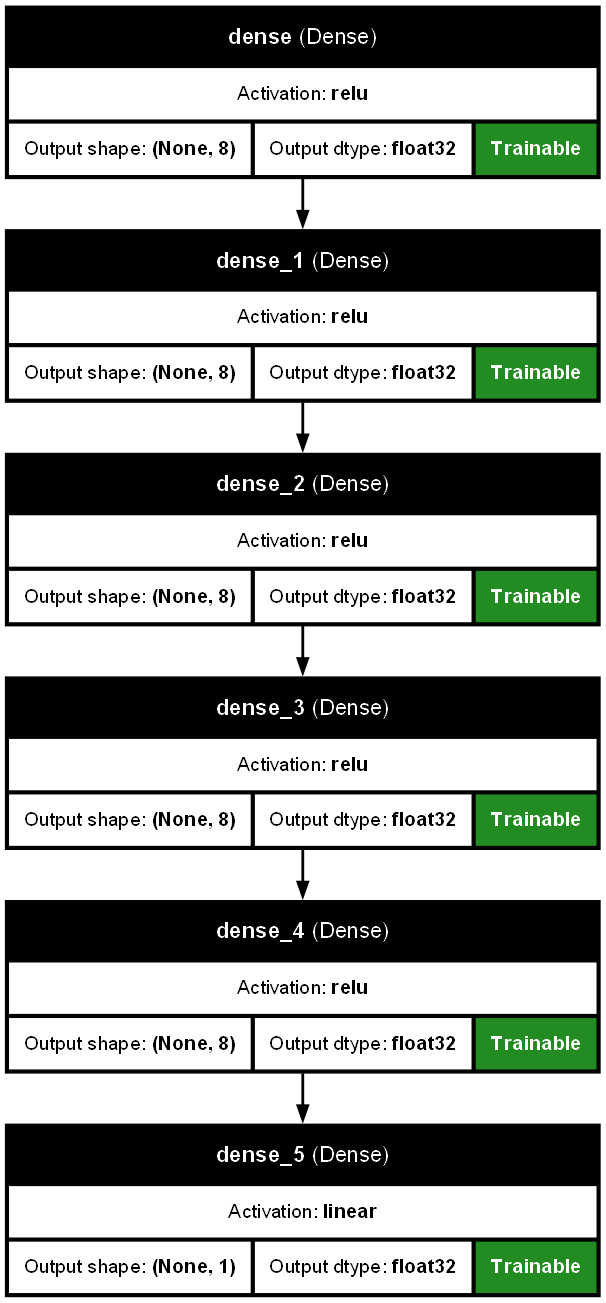

In [8]:
from keras.utils import plot_model
plot_model(
  model = ANN, 
  to_file = "Model.png",   
  show_shapes = True, 
  show_dtype = True, 
  show_layer_names = True, 
  show_layer_activations = True, 
  show_trainable = True, 
  dpi = 100
  )

In [9]:
from sklearn.metrics import r2_score
prediction = ANN.predict( X_test )
r2_score(y_test, prediction)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


0.8675221453514312

In [10]:
import numpy as np
y_test = y_test.reshape(len(y_test), 1)
prediction = prediction.reshape(len(prediction), 1)
np.concatenate( (y_test, prediction), 1 )

array([[340165.       , 363492.625    ],
       [158250.5      , 165532.171875 ],
       [312323.5      , 329224.1875   ],
       [549406.       , 515711.0625   ],
       [397522.       , 336225.84375  ],
       [193067.       , 212172.15625  ],
       [207480.5      , 176721.734375 ],
       [418934.       , 443393.78125  ],
       [132159.       , 169349.125    ],
       [265194.       , 179022.59375  ],
       [309449.       , 256627.21875  ],
       [281037.5      , 290311.09375  ],
       [157507.       , 158529.203125 ],
       [305463.       , 208735.375    ],
       [227669.       , 144221.453125 ],
       [494345.5      , 491384.3125   ],
       [504643.5      , 503483.90625  ],
       [498712.       , 458461.65625  ],
       [178180.5      , 231913.78125  ],
       [325176.       , 258813.875    ],
       [334502.       , 210578.84375  ],
       [547378.       , 518431.59375  ],
       [ 98311.5      ,  78794.8828125],
       [404800.5      , 396435.84375  ],
       [ 76772. 